# Loan Predictions

A financial institution wants us to help them identify customers who have a lesser chance of defaulting on the loan.

The company management has asked the data science team to build a predictive model to identify who would be a good customer. Furthermore, they want the team to come up with questions to ask the client, based on the model, when they are applying for loan.

# Data Understanding
    -The dataset resembles a real-world dataset and has many of the same challenges. It has:
    -Missing values
    -Spelling differences
    -Punctuation format
    -Duplicates rows

# Data Preparation
-Split your data into training and testing
-Start with Exploratory data analysis
-Data cleaning
-Handling the missing values
-Transform categorical data into numeric
-Feature Engineering (such as credit utilization)
-The goal is to clean the dataset and get it ready for the Algorithms

# Modeling
-Algorithm Selection
-Depending on the question at hand you can decide which algorithm to choose

# Classification Question
-Pick a classification algorithm
-Regression based
-Tree based
-Distance based
-Probability based
-Model Evaluation
-Evaluation criteria

# Modeling
-Pick an algorithm Train the algorithm  using training data
-Evaluate the trained model. 
-Use the trained model to predict who is a good customer on test data. 
-Come up with questions to ask the customer when they apply for a loan.

In [18]:
#importin required packcages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

pd.set_option("display.max_columns",100)
pd.set_option("display.max_rows",100)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [19]:
df=pd.read_csv('LoansTrainingSet.csv') # importinf data

# EDA - Explorary Data Analysis

In [20]:
df.describe()

,Current Loan Amount,Credit Score,Annual Income,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Bankruptcies,Tax Liens
count,2.569840e+05,195308.000000,1.953080e+05,256984.000000,116601.000000,256984.000000,256984.000000,2.569840e+05,256455.000000,256961.000000
mean,1.371331e+07,1251.116099,7.195272e+04,18.290195,34.881450,11.106267,0.156628,1.540656e+04,0.110316,0.027203
std,3.438131e+07,1762.016848,5.887757e+04,7.075747,21.854165,4.982982,0.460731,1.966506e+04,0.336229,0.245950
min,5.050000e+02,585.000000,0.000000e+00,3.400000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,8.299000e+03,714.000000,4.432100e+04,13.500000,16.000000,8.000000,0.000000,5.974000e+03,0.000000,0.000000
50%,1.429800e+04,733.000000,6.124200e+04,17.000000,32.000000,10.000000,0.000000,1.107800e+04,0.000000,0.000000
75%,2.436700e+04,744.000000,8.646200e+04,21.700000,51.000000,14.000000,0.000000,1.931900e+04,0.000000,0.000000
max,1.000000e+08,7510.000000,8.713547e+06,70.500000,176.000000,76.000000,11.000000,1.731412e+06,7.000000,11.000000


In [21]:
df.corr(numeric_only=True)

,Current Loan Amount,Credit Score,Annual Income,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Bankruptcies,Tax Liens
Current Loan Amount,1.000000,-0.139743,0.024069,0.014725,0.003488,-0.003094,-0.000062,0.003138,0.003576,-0.003069
Credit Score,-0.139743,1.000000,-0.033221,-0.011658,-0.007994,0.008124,0.000777,-0.003263,-0.003426,0.004381
Annual Income,0.024069,-0.033221,1.000000,0.146859,-0.059675,0.140463,-0.013672,0.292165,-0.044837,0.038185
Years of Credit History,0.014725,-0.011658,0.146859,1.000000,-0.039695,0.128033,0.061251,0.201001,0.062049,0.020915
Months since last delinquent,0.003488,-0.007994,-0.059675,-0.039695,1.000000,-0.035803,0.088612,-0.024292,0.112907,0.002730
Number of Open Accounts,-0.003094,0.008124,0.140463,0.128033,-0.035803,1.000000,-0.013731,0.222763,-0.022805,0.005754
Number of Credit Problems,-0.000062,0.000777,-0.013672,0.061251,0.088612,-0.013731,1.000000,-0.103814,0.755866,0.584917
Current Credit Balance,0.003138,-0.003263,0.292165,0.201001,-0.024292,0.222763,-0.103814,1.000000,-0.117995,-0.011118
Bankruptcies,0.003576,-0.003426,-0.044837,0.062049,0.112907,-0.022805,0.755866,-0.117995,1.000000,0.046160
Tax Liens,-0.003069,0.004381,0.038185,0.020915,0.002730,0.005754,0.584917,-0.011118,0.046160,1.000000


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256984 entries, 0 to 256983
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       256984 non-null  object 
 1   Customer ID                   256984 non-null  object 
 2   Loan Status                   256984 non-null  object 
 3   Current Loan Amount           256984 non-null  int64  
 4   Term                          256984 non-null  object 
 5   Credit Score                  195308 non-null  float64
 6   Years in current job          245508 non-null  object 
 7   Home Ownership                256984 non-null  object 
 8   Annual Income                 195308 non-null  float64
 9   Purpose                       256984 non-null  object 
 10  Monthly Debt                  256984 non-null  object 
 11  Years of Credit History       256984 non-null  float64
 12  Months since last delinquent  116601 non-nul

In [23]:
df.isnull().sum()

Loan ID                              0
Customer ID                          0
Loan Status                          0
Current Loan Amount                  0
Term                                 0
Credit Score                     61676
Years in current job             11476
Home Ownership                       0
Annual Income                    61676
Purpose                              0
Monthly Debt                         0
Years of Credit History              0
Months since last delinquent    140383
Number of Open Accounts              0
Number of Credit Problems            0
Current Credit Balance               0
Maximum Open Credit                  0
Bankruptcies                       529
Tax Liens                           23
dtype: int64

# Data Visualization

<Axes: xlabel='Home Ownership', ylabel='Count'>

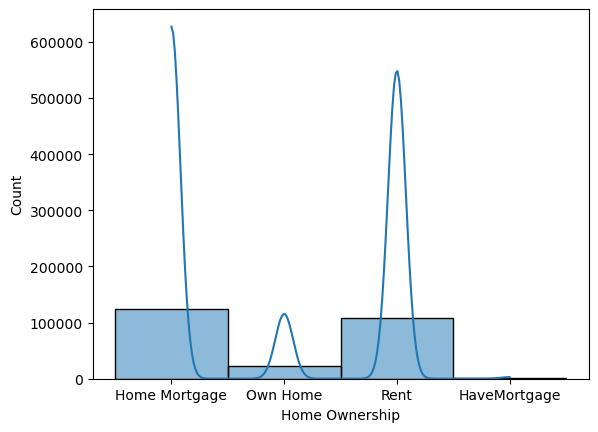

In [24]:
sns.histplot(df['Home Ownership'],kde=True)

<Axes: >

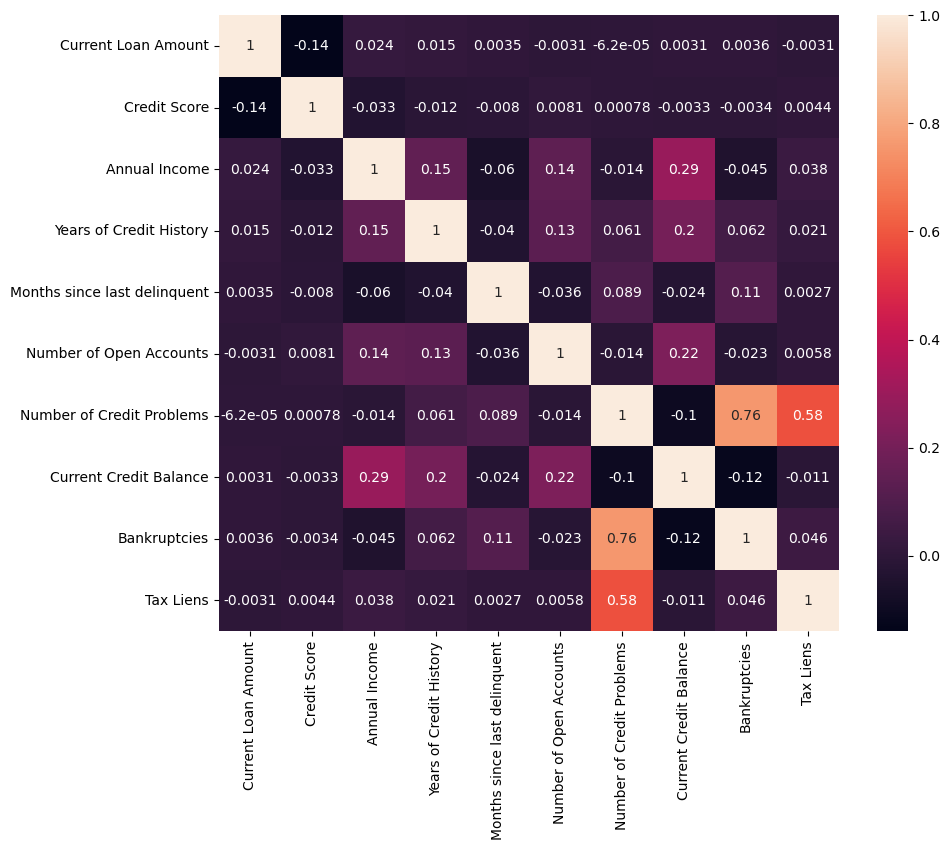

In [25]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True),annot=True)

<Axes: xlabel='Annual Income', ylabel='Density'>

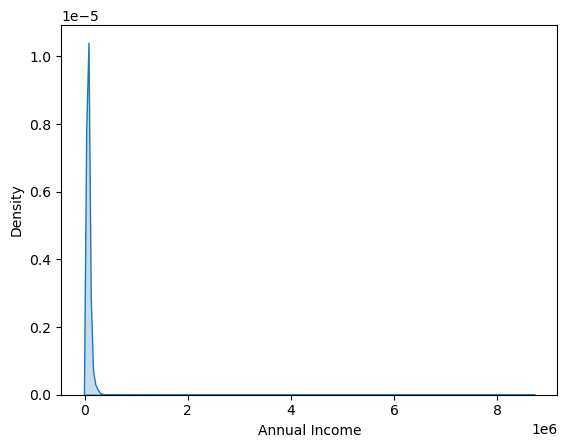

In [26]:
sns.kdeplot(df['Annual Income'],fill=True)

# Feature Engineering

In [27]:
df['Credit Score'].fillna(df['Credit Score'].min(),inplace=True)

In [28]:
df['Annual Income'].fillna(df['Annual Income'].min(),inplace=True)

In [29]:
df['Months since last delinquent'].fillna(df['Months since last delinquent'].mean(), inplace=True)

In [30]:
df.drop(['Loan ID','Customer ID'], axis=1,inplace=True)

In [31]:
df['Maximum Open Credit'].replace('0', 0,inplace=True)
df['Maximum Open Credit'].replace('#VALUE!', np.nan,inplace=True)   
df['Maximum Open Credit'] = df['Maximum Open Credit'].astype(float)

In [32]:
df['Maximum Open Credit'].fillna(df['Maximum Open Credit'].mean(),inplace=True)

In [33]:
df.isnull().sum()

Loan Status                         0
Current Loan Amount                 0
Term                                0
Credit Score                        0
Years in current job            11476
Home Ownership                      0
Annual Income                       0
Purpose                             0
Monthly Debt                        0
Years of Credit History             0
Months since last delinquent        0
Number of Open Accounts             0
Number of Credit Problems           0
Current Credit Balance              0
Maximum Open Credit                 0
Bankruptcies                      529
Tax Liens                          23
dtype: int64

# Modelling

In [34]:
x=df[['Annual Income','Maximum Open Credit','Credit Score']]
y=df['Loan Status']

In [35]:
x.head()

,Annual Income,Maximum Open Credit,Credit Score
0,33694.0,16056.0,741.0
1,42269.0,19149.0,734.0
2,90126.0,28335.0,747.0
3,38072.0,43915.0,747.0
4,50025.0,37081.0,746.0


In [36]:
x['Maximum Open Credit']=x['Maximum Open Credit'].astype(float)

In [37]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256984 entries, 0 to 256983
Data columns (total 3 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Annual Income        256984 non-null  float64
 1   Maximum Open Credit  256984 non-null  float64
 2   Credit Score         256984 non-null  float64
dtypes: float64(3)
memory usage: 5.9 MB


In [38]:
#x=pd.get_dummies(x,drop_first=True)

In [39]:
x.shape

(256984, 3)

In [40]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.20,random_state=42)

In [41]:

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier


def algo_test(x,y):
        #Bütün modelleri tanımlıyorum
        gnb=GaussianNB()
        bnb=BernoulliNB()
        lr=LogisticRegression()
        dt=DecisionTreeClassifier()
        rf=RandomForestClassifier()
        gbc=GradientBoostingClassifier()
        knc=KNeighborsClassifier()
        

       
        
        algos=[gnb,bnb,lr,dt,rf,gbc,knc]
        algo_names=['GaussianNB','BernoulliNB','LogisticRegression','DecisionTreeClassifier','RandomForestClassifier','GradientBoostingClassifier','KNeighborsClassifier']
        
        x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=.20,random_state=42)
        
        confusion_matrixes= []
        classification_reports= []
        accuracy_scores=[]        
        
        for algo in algos:
            p=algo.fit(x_train,y_train).predict(x_test)
            classification_reports.append(classification_report(p , y_test))
            confusion_matrixes.append(confusion_matrix(p , y_test))
            accuracy_scores.append(accuracy_score(p , y_test))

        for i in range(len(algo_names)):
            print('Algorithm:'+ '\n' , algo_names[i])
            print('Confusion Matrix:'+ '\n' , confusion_matrixes[i])
            print('Classification Report: '+ '\n' , classification_reports[i])
            print('Accuracy Score:'+ '\n' , accuracy_scores[i])
            print('************************************************************')

In [42]:
algo_test(x,y)

Algorithm:
 GaussianNB
Confusion Matrix:
 [[ 3276    74]
 [12885 35162]]
Classification Report: 
               precision    recall  f1-score   support

 Charged Off       0.20      0.98      0.34      3350
  Fully Paid       1.00      0.73      0.84     48047

    accuracy                           0.75     51397
   macro avg       0.60      0.85      0.59     51397
weighted avg       0.95      0.75      0.81     51397

Accuracy Score:
 0.747864661361558
************************************************************
Algorithm:
 BernoulliNB
Confusion Matrix:
 [[    0     0]
 [16161 35236]]
Classification Report: 
               precision    recall  f1-score   support

 Charged Off       0.00      0.00      0.00         0
  Fully Paid       1.00      0.69      0.81     51397

    accuracy                           0.69     51397
   macro avg       0.50      0.34      0.41     51397
weighted avg       1.00      0.69      0.81     51397

Accuracy Score:
 0.6855653053680176
*****************

In [43]:
rfc=RandomForestClassifier()
rfc.fit(x,y)

RandomForestClassifier()

In [44]:
pred=rfc.predict(x_test)

In [45]:
accuracy_score(pred,y_test)

0.9674835107107419

In [46]:
confusion_matrix(pred,y_test)

array([[ 60413,   2506],
       [  4179, 138490]])

<Axes: >

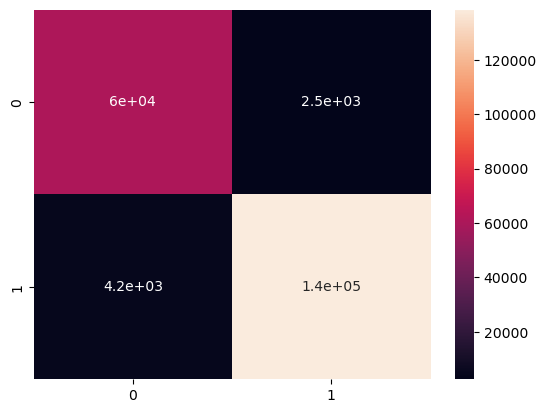

In [47]:
sns.heatmap(confusion_matrix(pred,y_test),annot=True)